In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("../data/cleaned.csv")

In [4]:
V = df['vote_count']
C = df['vote_average'].mean()
R = df['vote_average']

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='vote_count'>

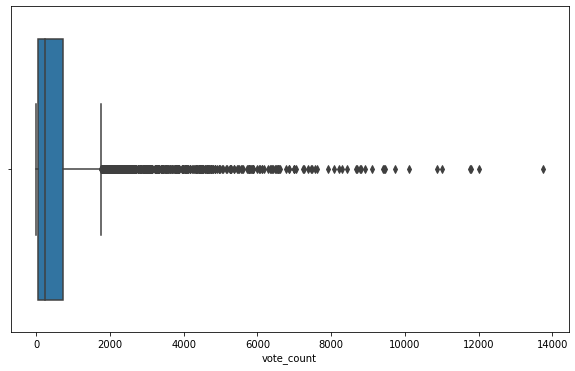

In [5]:
plt.figure(figsize=(10,6))
sns.boxplot(df['vote_count'])

In [6]:
threshold = df['vote_count'].quantile(.9)
# how does a higher quantile affect the algo
# M = df['vote_count'].quantile(.95)
threshold

1838.4000000000015

In [7]:
data = df[df['vote_count'] > threshold]

In [8]:
def avg_weighted_score(x, m=threshold, C=C):
  V = x["vote_count"]
  R = x["vote_average"]
  return ((R*V) + (C*m)) / ( V + m)
    

In [9]:
# row = df.iloc[0:1, :]
# weight = avg_weighted_score(row)
# print(weight)

In [10]:
data['weighted_score'] = data.apply(avg_weighted_score, axis=1)

sorted_data = data.sort_values('weighted_score', ascending=False)

/var/folders/9q/cz9d07g96xx8k2mkv03pcz1r0000gn/T/ipykernel_78500/1605856273.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['weighted_score'] = data.apply(avg_weighted_score, axis=1)


In [11]:
sorted_data.head(3)

,Unnamed: 0,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew,weighted_score
1881,1881,25000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",278,"[{""id"": 378, ""name"": ""prison""}, {""id"": 417, ""n...",en,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,136.747729,"[{""name"": ""Castle Rock Entertainment"", ""id"": 97}]",1994-09-23,28341469,142.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Fear can hold you prisoner. Hope can set you f...,8.5,8205,"[{""cast_id"": 3, ""character"": ""Andy Dufresne"", ...","[{""credit_id"": ""52fe4231c3a36847f800b153"", ""de...",8.059258
662,662,63000000,"[{""id"": 18, ""name"": ""Drama""}]",550,"[{""id"": 825, ""name"": ""support group""}, {""id"": ...",en,Fight Club,A ticking-time-bomb insomniac and a slippery s...,146.757391,"[{""name"": ""Regency Enterprises"", ""id"": 508}, {...",1999-10-15,100853753,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Mischief. Mayhem. Soap.,8.3,9413,"[{""cast_id"": 4, ""character"": ""The Narrator"", ""...","[{""credit_id"": ""55731b8192514111610027d7"", ""de...",7.939256
65,65,185000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 28, ""name...",155,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight,Batman raises the stakes in his war on crime. ...,187.322927,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""L...",2008-07-16,1004558444,152.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Why So Serious?,8.2,12002,"[{""cast_id"": 35, ""character"": ""Bruce Wayne"", ""...","[{""credit_id"": ""55a0eb4a925141296b0010f8"", ""de...",7.920020


In [12]:
sorted_data[['original_title', 'weighted_score', 'tagline', 'popularity']].head(5)

,original_title,weighted_score,tagline,popularity
1881,The Shawshank Redemption,8.059258,Fear can hold you prisoner. Hope can set you f...,136.747729
662,Fight Club,7.939256,Mischief. Mayhem. Soap.,146.757391
65,The Dark Knight,7.920020,Why So Serious?,187.322927
3232,Pulp Fiction,7.904645,Just because you are a character doesn't mean ...,121.463076
96,Inception,7.863239,Your mind is the scene of the crime.,167.583710


Text(0, 0.5, 'Movie title')

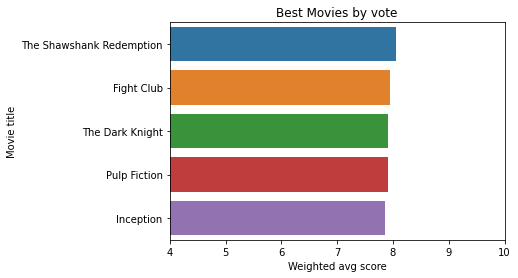

In [113]:
sns.barplot(x=sorted_data['weighted_score'].head(5), y=sorted_data['original_title'].head(5), data=sorted_data)
plt.xlim(4, 10)
plt.title('Best Movies by vote')
plt.xlabel('Weighted avg score')
plt.ylabel('Movie title')